# Experiment testing

## Seminar №2: Hypothesis testing.

> "Paul the Octopus was a common octopus used to predict the results of international association football matches. Accurate predictions in the 2010 World Cup brought him worldwide attention as an animal oracle."

### 1. Formulating a hypothesis

Conducting an A/B-test we always want to answer a question: **"Has the change produced a positive (or negative) result to our members and business itself?"**

To answer this question, we select a key metric, analyze user actions and then compare the results. Given this, we can form null and alternative hypotheses in the statistics language:

$$
\begin{aligned}
& H_0: \text{there are no changes} \\
& H_A: \text{there are changes} \\
& \\
& H_0: \bar x_A = \bar x_B \\
& H_A: \bar x_A \neq \bar x_B \\
& \\
& H_0: \bar x_A - \bar x_B = 0\\
& H_A: \bar x_A - \bar x_B \neq 0
\end{aligned}
$$

### 2. Comparing the results

### Bad way

Imagine that we managed the A/B-test and got the following results: 

$\bar x_A = 25.6 \quad \bar x_B = 28 \Rightarrow \bar x_B - \bar x_A = 2.4 > 0 \Rightarrow \text{great!!!}$

Does it mean that the new design is better? **The answer is no** and there are two reasons for this:

1. $\bar x_A$ and $\bar x_B$ are _random variables_ that are calculated from _randomly generated samples_. If we had selected people into groups a little differently, we would have received completely different numbers. So, it is necessary to correctly assess _the degree of this randomness_.
2. we don't understand _the threshold_ by which we make a decision. How much is it for us to change the metric to $+2.4$? What if it were to $+1.4$ or $+0.5$? Is it a lot? 

### Good way

Let's look at the situation from the statistical side. We have a random variable $\bar x_B - \bar x_A$. Any random variable is arranged in its own way, that is, it has some kind of distribution. Then we can:

1. determine what distribution this variable has, if there are actually no changes (if we believe in the $H_0$ hypothesis). We will call it $H_0$ distribution. 
2. see where our current value of this variable ($2.4$) got into $H_0$ distribution
3. comparing with the threshold, understand how likely it is for us and make a decision about rejecting or not rejecting the $H_0$ hypothesis



In [28]:
import numpy as np
import scipy.stats as sts
from matplotlib import pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
%matplotlib inline

In [18]:
norm_rv_zero = sts.norm(loc=0, scale=3)
norm_rv_alt = sts.norm(loc=10, scale=3)

n_obs = 10**6

x_zero = norm_rv_zero.rvs(n_obs)
x_alt = norm_rv_alt.rvs(n_obs)

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


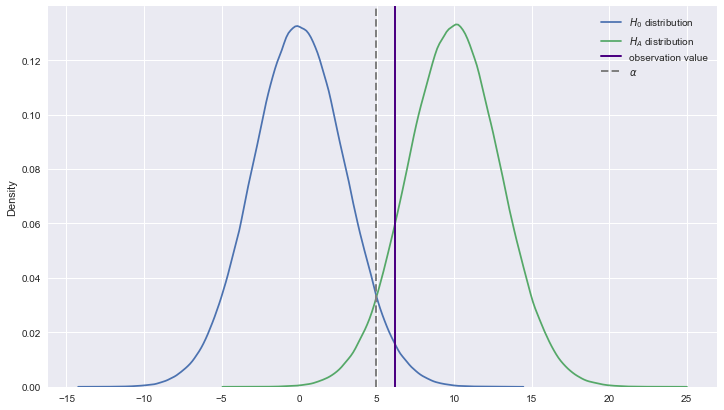

In [33]:
plt.figure(figsize=(12, 7))

sns.distplot(x_zero, hist=False, label='$H_0$ distribution')
sns.distplot(x_alt, hist=False, label='$H_A$ distribution')
plt.axvline(x=6.2, color='#4b0082', ls='-', lw=2, label='observation value')
plt.axvline(x=norm_rv_zero.ppf(0.95), color='grey', ls='--', lw=2, label='$\\alpha$')

plt.legend()
plt.show()